In [1]:
import os
import subprocess

def git_repo_root():
    # Run the 'git rev-parse --show-toplevel' command to get the root directory of the Git repository
    try:
        root = subprocess.check_output(['git', 'rev-parse', '--show-toplevel'], universal_newlines=True).strip()
        return root
    except subprocess.CalledProcessError:
        # Handle the case where the current directory is not inside a Git repository
        return None

# Get the root directory of the Git repository
git_root = git_repo_root()

if git_root:
    # Change the working directory to the root of the Git repository
    os.chdir(git_root)
    print(f"Changed working directory to: {git_root}")
else:
    print("Not inside a Git repository.")

Changed working directory to: /Users/stephenrobbins/Documents/Documents-Stephens_MacBook_Pro/Python/Random/Diffusion_project


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


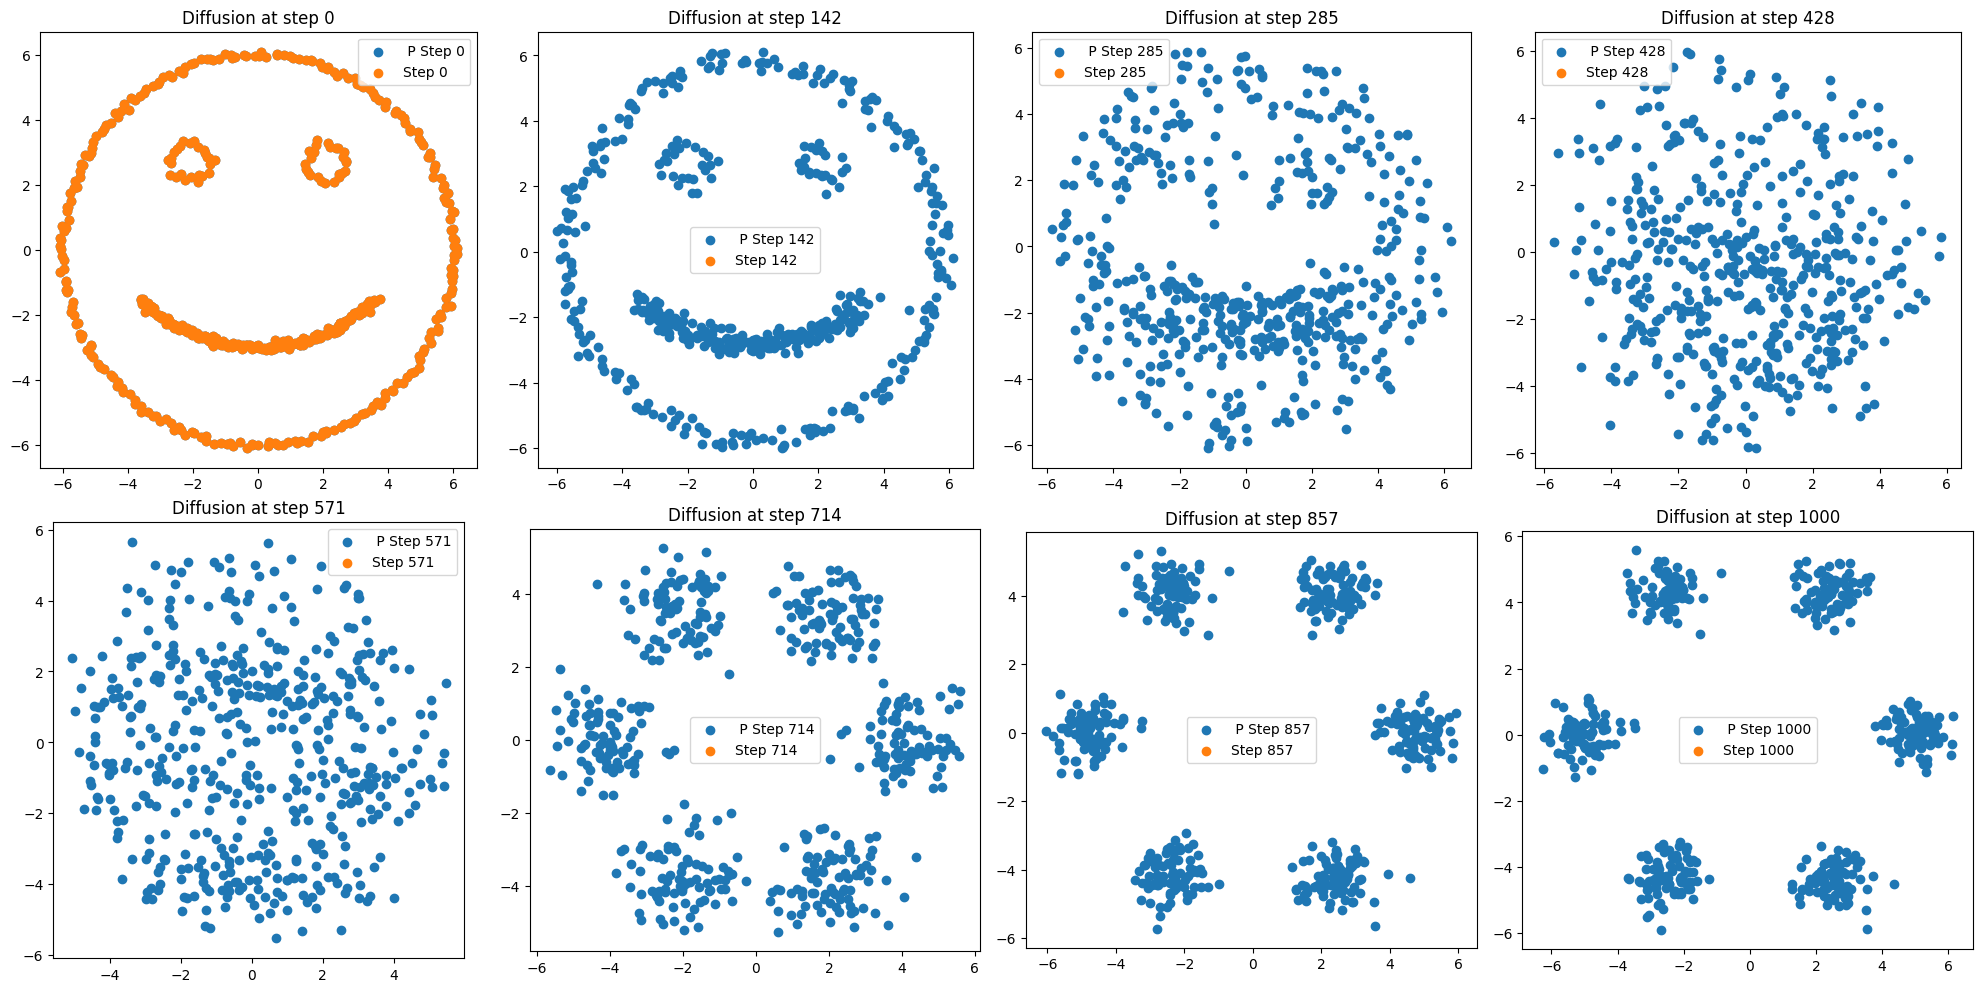

In [7]:
%load_ext autoreload
%autoreload 2

from diffusion import BridgeDiffusionVPSDE
from data import generate_mixture_gaussians
from data import generate_happy_face

# Make sure our diffusion process actually builds the bridge

data_x= generate_happy_face(500)
sde = BridgeDiffusionVPSDE(generate_mixture_gaussians,  bmin=.1, bmax=1)

sde.plot_forward_diffusion(data_x)
#For some reason the euler method fails at step 1000, idk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  7%|▋         | 1000/15000 [14:22<3:05:05,  1.26it/s]

Epoch: 1000 and Loss: 13.608236312866211


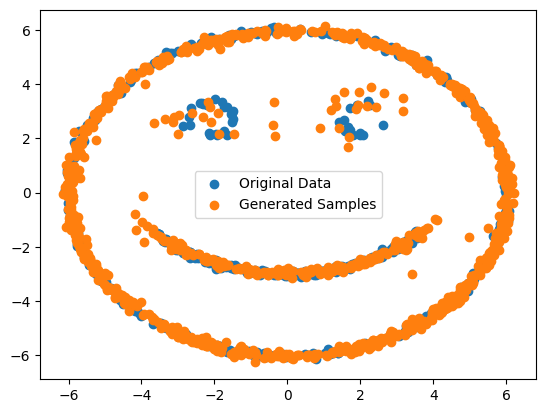

 13%|█▎        | 2000/15000 [27:55<2:53:08,  1.25it/s] 

Epoch: 2000 and Loss: 12.39431381225586


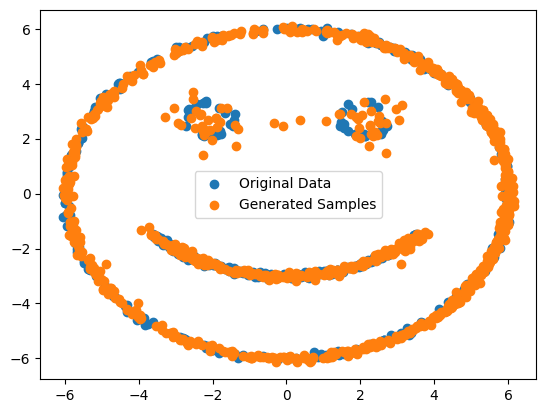

 20%|██        | 3000/15000 [40:16<2:32:31,  1.31it/s] 

Epoch: 3000 and Loss: 12.26255989074707


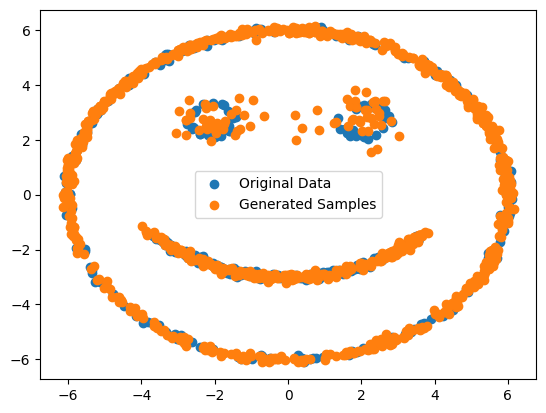

 27%|██▋       | 4000/15000 [52:37<2:11:27,  1.39it/s] 

Epoch: 4000 and Loss: 12.176849365234375


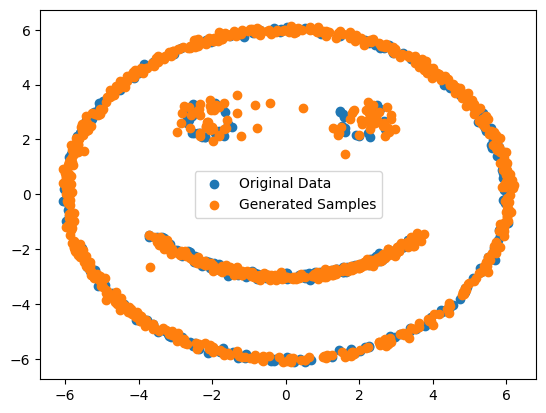

 33%|███▎      | 5000/15000 [1:05:10<2:11:26,  1.27it/s]

Epoch: 5000 and Loss: 12.119787216186523


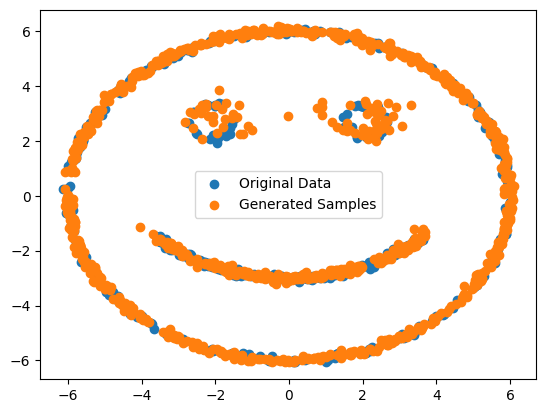

 40%|████      | 6000/15000 [1:17:25<1:48:46,  1.38it/s] 

Epoch: 6000 and Loss: 12.075082778930664


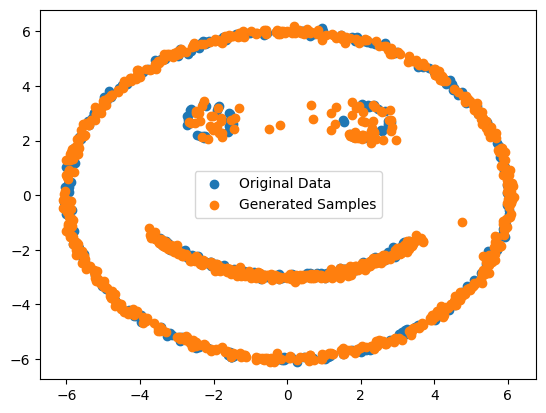

 47%|████▋     | 7000/15000 [1:29:41<1:33:03,  1.43it/s] 

Epoch: 7000 and Loss: 12.032154083251953


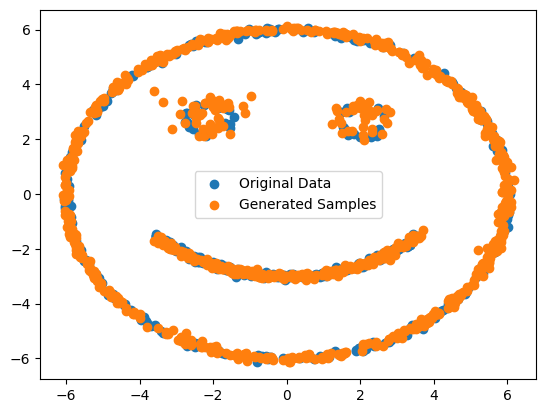

 53%|█████▎    | 8000/15000 [1:42:01<1:39:39,  1.17it/s] 

Epoch: 8000 and Loss: 12.003382682800293


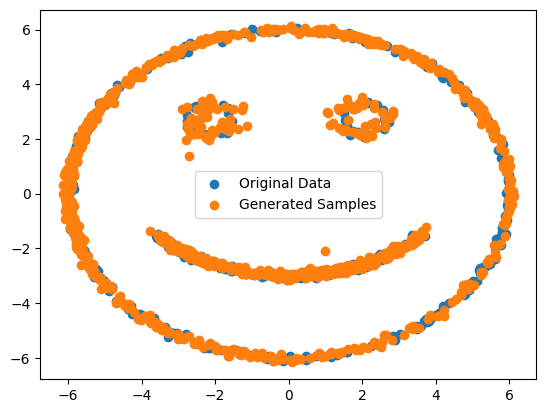

 60%|██████    | 9000/15000 [1:54:16<1:13:38,  1.36it/s] 

Epoch: 9000 and Loss: 11.966106414794922


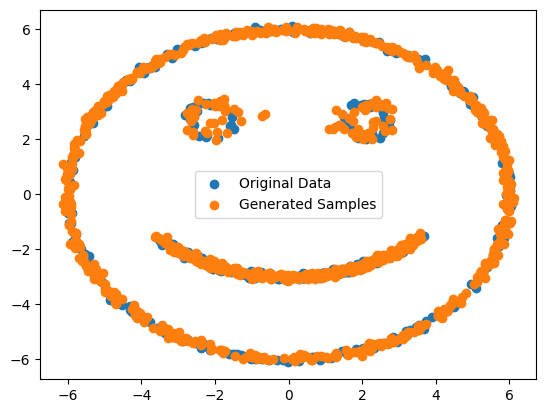

 67%|██████▋   | 10000/15000 [2:06:29<1:00:00,  1.39it/s]

Epoch: 10000 and Loss: 11.931525230407715


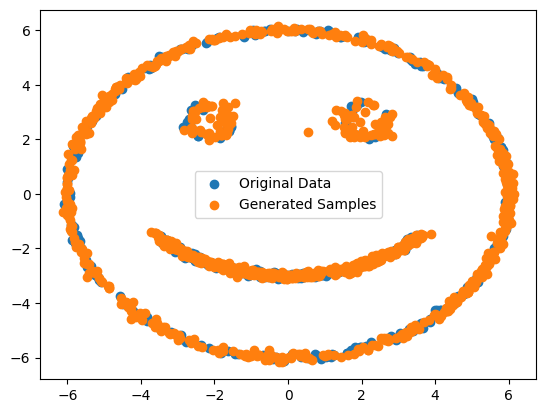

 73%|███████▎  | 11000/15000 [2:18:45<49:56,  1.33it/s]  

Epoch: 11000 and Loss: 11.896130561828613


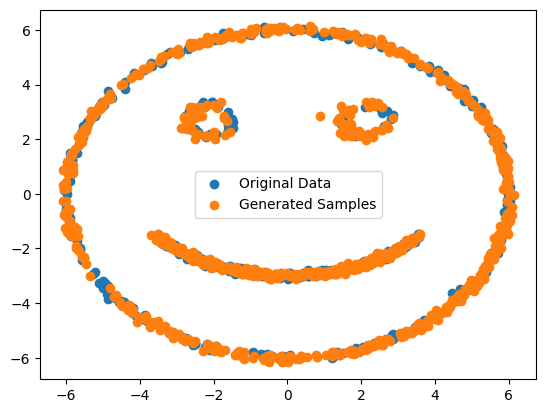

 80%|████████  | 12000/15000 [2:31:08<35:04,  1.43it/s]  

Epoch: 12000 and Loss: 11.87962818145752


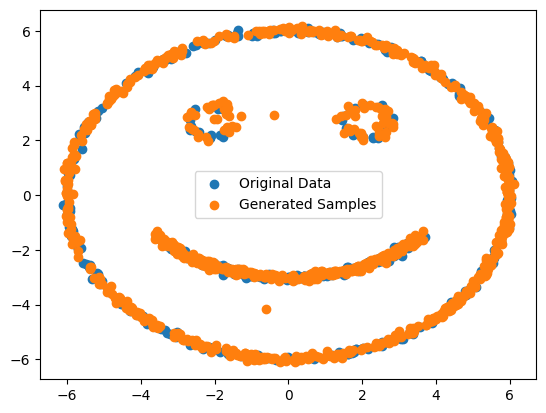

 87%|████████▋ | 13000/15000 [2:43:21<24:30,  1.36it/s]  

Epoch: 13000 and Loss: 11.85353946685791


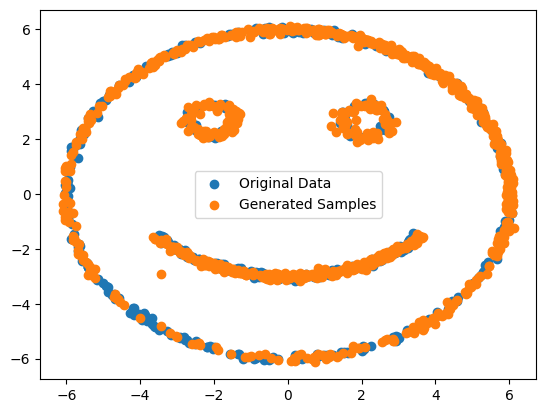

 93%|█████████▎| 14000/15000 [2:55:37<12:04,  1.38it/s]  

Epoch: 14000 and Loss: 11.840450286865234


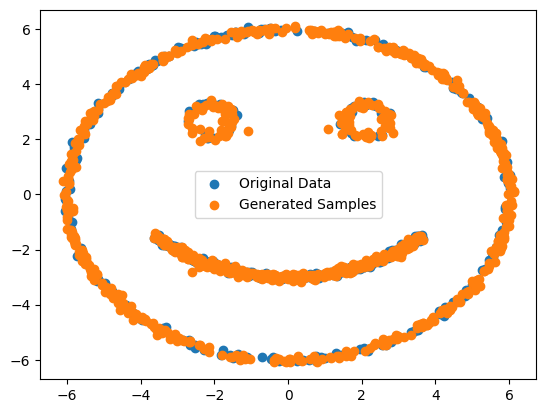

100%|█████████▉| 14999/15000 [3:07:52<00:00,  1.38it/s]  

Epoch: 14999 and Loss: 11.817902565002441


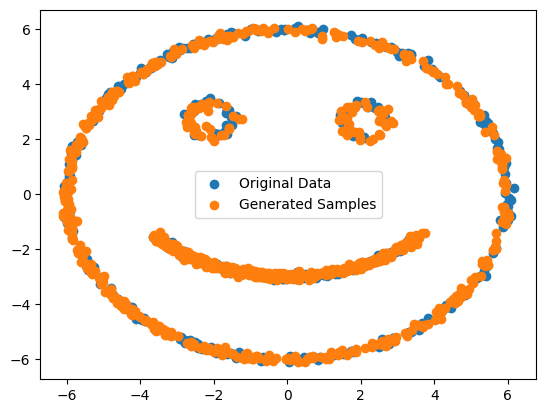

100%|██████████| 15000/15000 [3:08:08<00:00,  1.33it/s]


In [20]:
%load_ext autoreload
%autoreload 2

from torch.utils.data import DataLoader, TensorDataset
from training import train_score_network
from model import Bridge_Diffusion_Net

sde = BridgeDiffusionVPSDE(generate_mixture_gaussians,  bmin=.1, bmax=1)
data = generate_happy_face(num_samples=32000)
dataloader = DataLoader(TensorDataset(data), batch_size=500, shuffle=True)
score_net = Bridge_Diffusion_Net(input_dim=4, output_dim=2)

train_score_network(dataloader, score_net, sde, epochs=15000, bridge=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


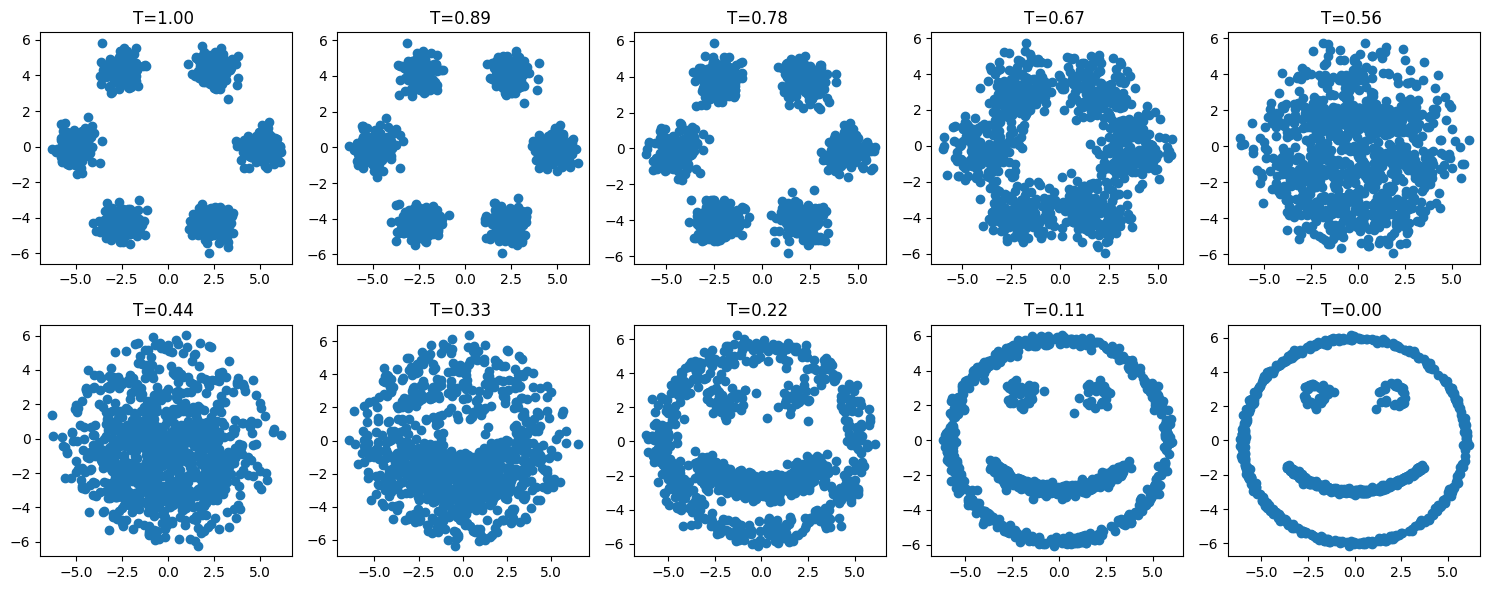

In [40]:
%load_ext autoreload
%autoreload 2
from diffusion import BridgeDiffusionVPSDE
import matplotlib.pyplot as plt

import math

def plot_x_snapshots(x_snapshots, labels=None):
    if not x_snapshots:
        print("No data to plot.")
        return

    num_plots = len(x_snapshots)
    n=9
    plot_intervals=[i / n for i in range(num_plots + 1)]
    num_cols = 5  # You can adjust this number based on your preference
    num_rows = math.ceil(num_plots / num_cols)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 3, num_rows * 3), squeeze=False)

    for i, snapshot in enumerate(x_snapshots):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        ax.scatter(snapshot[:, 0], snapshot[:, 1])

    
        ax.set_title(f"T={(1-plot_intervals[i]):.2f} " )



    # Hide any unused subplots
    for j in range(i+1, num_rows*num_cols):
        axes.flat[j].set_visible(False)

    plt.tight_layout()
    plt.show()

sde = BridgeDiffusionVPSDE(generate_mixture_gaussians,  bmin=.1, bmax=1)
n=9
plot_intervals=[i / n for i in range(n + 1)]
plot_steps = [int(ts * 1000) for ts in plot_intervals]
plot_steps[-1]=plot_steps[-1]-1

x_snapshots=sde.backward_diffusion1(score_net, plot_steps=plot_steps )

plot_x_snapshots(x_snapshots, labels=None)
